# Lab 6.2: Linear Regression

In [2]:
%pylab inline

import pandas as pd
import statsmodels.api as sm
import yaml

from seaborn import pairplot
from sqlalchemy import create_engine

pg_creds = yaml.load(open('../../pg_creds.yaml'))['student']

engine = create_engine('postgresql://{user}:{password}@{host}:{port}/{dbname}'.format(**pg_creds))

cars = pd.read_sql("SELECT * FROM cars WHERE horsepower IS NOT NULL;", engine, index_col='index')

Populating the interactive namespace from numpy and matplotlib


**Question 1**  

Using the cars data,

1) Fit a simple linear regression to predict `mpg` using `weight`.  

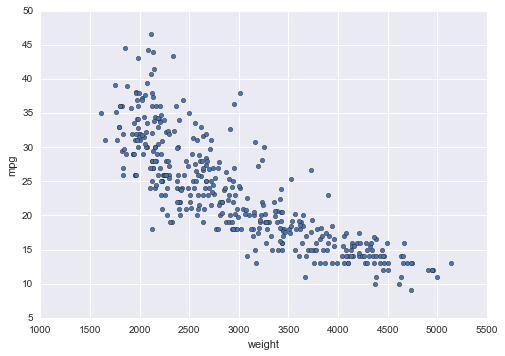

In [2]:
cars.plot('weight', 'mpg', kind='scatter');

In [3]:
X = cars.weight
X = sm.add_constant(X)
y = cars.mpg

model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     878.8
Date:                Wed, 05 Oct 2016   Prob (F-statistic):          6.02e-102
Time:                        12:25:47   Log-Likelihood:                -1130.0
No. Observations:                 392   AIC:                             2264.
Df Residuals:                     390   BIC:                             2272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         46.2165      0.799     57.867      0.000        44.646    47.787
weight        -0.0076      0.000    -29.645      0.000        -0.008    -0.007
==============================================================================
Omnibus:                       41.682   Durbin-Watson:                   0.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.039
Skew:                           0.727   Prob(JB):                     9.18e-14
Kurtosis:                       4.251   Cond. No.                     1.13e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model

$y = 46.22 - .0076x$

2) Comment on the model fit.  

#### Answer 1.2

Our model only explains roughly 69% of the variance, judging by our R^2 statistic. Also, the p-value of our weight coefficient seems to be a decent predictor of mpg. If we add in more explanatory variables, we could potentially increase our R^2

3) Interpret the model. 

#### Answer 1.3

For every one unit increase in weight, mpg will decrease by .0076 mpg.

4) Is `weight` useful for predicting `mpg`? Carry out a formal hypothesis test to show it.  

#### Answer 1.4

$$ H_0: \beta_1 = 0$$  
$$ H_a: \beta_1 \neq 0$$ 

$\text{Our model summary tells us that the p-value for} \ \beta_1 \ \text{is almost zero, so we can reject the null that it weight doesn't have an effect on mpg}$

5) Make a prediction for the average `mpg` of all cars that have a weight of 2000.  

In [4]:
x = cars.weight
se = sqrt(results.mse_resid)
b0, b1 = results.params

x_new = 2000

def confidence_se(s_e, x, x_new):
    mean_x = x.mean()
    var_x = x.var()
    n = len(x)
    return s_e * (1/n + (x_new - mean_x)**2 / ((n - 1) * var_x))**0.5

sign = array([-1., 1.])
b0 + b1 * x_new + sign * 1.96 * confidence_se(se, x, x_new) # this is our 95% CI for the average mpg of cars with weight of 2000

array([ 30.26741098,  31.57626797])

In [5]:
print("prediction of average mpg for cars with weight 2000 is", np.round(results.predict([1, 2000]),2))

prediction of average mpg for cars with weight 2000 is [ 30.92]


6) Make a prediction for a particular car that has a weight of 2000.  

In [6]:
def prediction_se(s_e, x, x_new):
    mean_x = x.mean()
    var_x = x.var()
    n = len(x)
    return s_e * (1 + 1/n + (x_new - mean_x)**2 / ((n - 1) * var_x))**0.5

b0 + b1 * x_new + sign * 1.96 * prediction_se(se, x, x_new) # this is our 95% CI for the mpg of a particular car with weight of 2000

array([ 22.40454496,  39.439134  ])

In [7]:
print("prediction of mpg for a particular car with weight 2000 is", np.round(results.predict([1, 2000]),2))

prediction of mpg for a particular car with weight 2000 is [ 30.92]


7) Write a Python function to calculate the confidence interval for your prediction in part 5).  

In [8]:
def CI_average(b0, b1, x_new, sign, se):
    return b0 + b1 * x_new + sign * 1.96 * confidence_se(se, x, x_new)

CI_average(b0, b1, x_new, sign, se)

array([ 30.26741098,  31.57626797])

8) Write a Python function to calculate the prediction interval for your prediction in part 6).  

In [9]:
def CI_particular(b0, b1, x_new, sign, se):
    return b0 + b1 * x_new + sign * 1.96 * prediction_se(se, x, x_new)

CI_particular(b0, b1, x_new, sign, se)

array([ 22.40454496,  39.439134  ])

9) What are the differences between the intervals you found in parts 7) and 8)?

#### commentary

The CI for the average is more accurate than the CI for the particular by about +/- 8 mpg.

**Question 2**  

You are shopping for a laptop computer at Best Buy. To help you with your decision, you decide to construct a regression model to predict the selling price of the laptop. The table `laptops` provides the following data for a random sample of laptops on Best Buy’s Web site:  

* Selling price
* Brand
* Screen size (in.)
* Hard drive size (GB)
* Amount of RAM memory (GB)
* Number of USB ports
* Weight (oz.) 

a) Using multiple regression, model selling price using the variables screen size, hard drive size, amount of ram, number of usb ports and weight.  

In [7]:
laptops = pd.read_sql("SELECT * FROM laptops;", engine)
laptops.head()

,Price ($),Screen Size (in.),RAM Memory (GB),Hard drive (GB),USB Ports,Brand,Weight (oz.)
0,830,13.3,4,500,3,Toshiba,4.9
1,750,13.3,4,640,3,Toshiba,3.2
2,1200,11.6,2,128,2,Apple,2.3
3,1600,18.4,6,640,4,Toshiba,9.7
4,1900,18.4,8,500,4,Toshiba,9.7


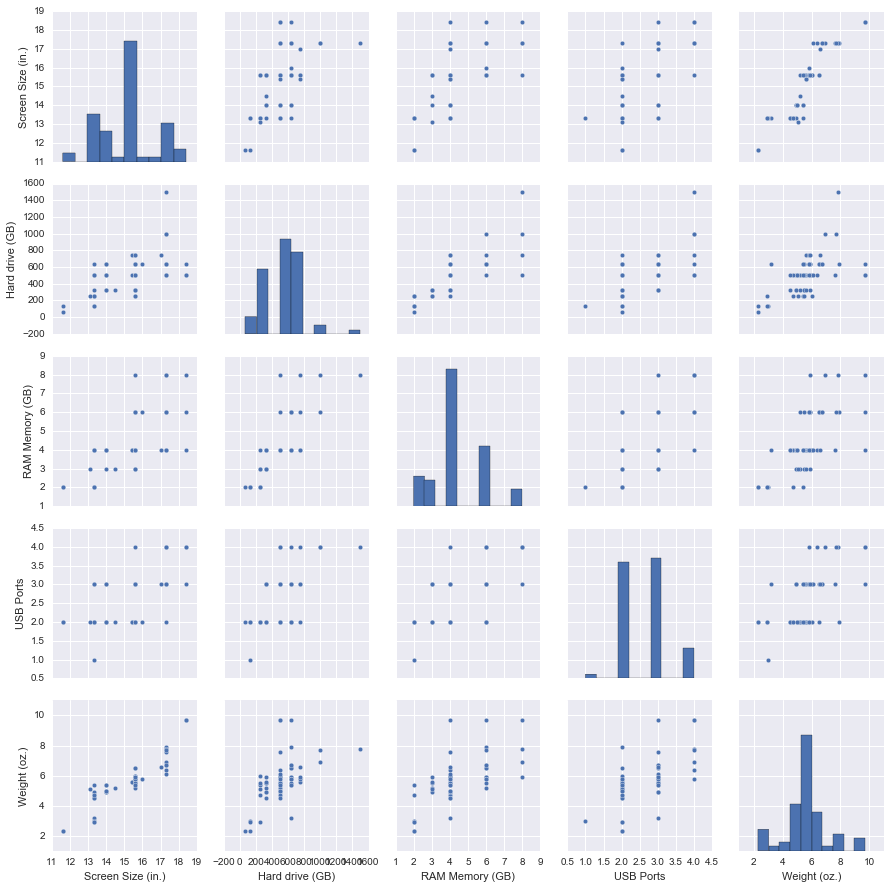

In [8]:
X3 = laptops[['Screen Size (in.)', 'Hard drive (GB)', 'RAM Memory (GB)', 'USB Ports', 'Weight (oz.)']]
pairplot(X3);

In [9]:
laptops = laptops.rename(columns = {'Price ($)':'price'})
laptops.head()

,price,Screen Size (in.),RAM Memory (GB),Hard drive (GB),USB Ports,Brand,Weight (oz.)
0,830,13.3,4,500,3,Toshiba,4.9
1,750,13.3,4,640,3,Toshiba,3.2
2,1200,11.6,2,128,2,Apple,2.3
3,1600,18.4,6,640,4,Toshiba,9.7
4,1900,18.4,8,500,4,Toshiba,9.7


In [10]:
X3 = sm.add_constant(X3)
y3 = laptops.price

model3 = sm.OLS(y3, X3)
results3 = model3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     1.514
Date:                Wed, 05 Oct 2016   Prob (F-statistic):              0.200
Time:                        15:47:14   Log-Likelihood:                -477.99
No. Observations:                  63   AIC:                             968.0
Df Residuals:                      57   BIC:                             980.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
const               761.4987    946.954      0.804      0.425     -1134.744  2657.741
Screen Size (in.)     4.1113     96.206      0.043      0.966      -188.539   196.761
Hard drive (GB)       0.6561      0.459      1.429      0.159        -0.263     1.576
RAM Memory (GB)      12.8642     74.411      0.173      0.863      -136.141   161.870
USB Ports          -206.5346    123.563     -1.671      0.100      -453.965    40.896
Weight (oz.)         51.6251     99.210      0.520      0.605      -147.040   250.290
==============================================================================
Omnibus:                        9.835   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               10.384
Skew:                           0.993   Prob(JB):                      0.00556
Kurtosis:                       3.102   Cond. No.                     8.40e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

b) Perform and interpret the overall F test.  

Our p-value for the F-test is less than .05, so we have to fail to reject the null hypothesis that our Beta coefficients are equal to each other. Technically, our model is good, but its seem that way when we look at our r^2.

c) Using p-values, which variables appear to be needed in the model? Justify your answer.   

It seems that Hard drive and USB ports are the most necessary and influential indicators of price based on their p-values.

d) Now create a new predictor that contains random numbers drawn from your favorite distribution, and include this predictor in your multiple regression model. Comment on the model fit. How does the new $R^2$ compare to the one in part a)?  

In [11]:
laptops.insert(7, "CPU speed (GHz.)", (3 * np.random.random_sample((len(laptops), 1)) + 1))

In [12]:
laptops.head()

,price,Screen Size (in.),RAM Memory (GB),Hard drive (GB),USB Ports,Brand,Weight (oz.),CPU speed (GHz.)
0,830,13.3,4,500,3,Toshiba,4.9,3.191868
1,750,13.3,4,640,3,Toshiba,3.2,3.518970
2,1200,11.6,2,128,2,Apple,2.3,1.629558
3,1600,18.4,6,640,4,Toshiba,9.7,1.036959
4,1900,18.4,8,500,4,Toshiba,9.7,2.507531


In [13]:
X4 = laptops[['Screen Size (in.)', 'Hard drive (GB)', 'USB Ports', 
              'RAM Memory (GB)', 'Weight (oz.)', 'CPU speed (GHz.)']]

X4 = sm.add_constant(X4)
y3 = laptops.price

model3 = sm.OLS(y3, X4)
results3 = model3.fit()
results3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     2.494
Date:                Wed, 05 Oct 2016   Prob (F-statistic):             0.0329
Time:                        15:47:53   Log-Likelihood:                -474.46
No. Observations:                  63   AIC:                             962.9
Df Residuals:                      56   BIC:                             977.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
const              1379.1351    934.537      1.476      0.146      -492.967  3251.237
Screen Size (in.)    11.3905     91.814      0.124      0.902      -172.535   195.316
Hard drive (GB)       0.5069      0.442      1.147      0.256        -0.378     1.392
USB Ports          -216.7563    117.933     -1.838      0.071      -453.003    19.491
RAM Memory (GB)      15.3421     70.987      0.216      0.830      -126.861   157.545
Weight (oz.)         33.8813     94.886      0.357      0.722      -156.198   223.961
CPU speed (GHz.)   -199.4643     77.387     -2.577      0.013      -354.489   -44.439
==============================================================================
Omnibus:                       15.777   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.133
Skew:                           1.136   Prob(JB):                     0.000115
Kurtosis:                       4.322   Cond. No.                     8.68e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Commentary on model fit
Surprisingly, our R^2 is better when we add in random #'s (between 1 and 4) for CPU speed, however our f-stat is lower, so it doesn't necessarily mean our model is better. Also, the randomly generated CPU beta has a better beta than Screen Size, which is surpising to see. This still doesn't seem like a very good model for predicting price. It would be interesting to see how we migth be able to quantify brand and take that variable into account, as brand value definitely carries weight on pricing.

e) Generate another new predictor - you can draw another list of random numbers from the same distribution as above, or you can draw from a different distribution. Add this predictor to the model in part d). What happends to the $R^2$? Does this mean that the new predictor is useful for predicting laptop prices?

In [17]:
laptops.insert(8, "Has camera", (np.random.binomial(1, .5, len(laptops))))
laptops.head()

,price,Screen Size (in.),RAM Memory (GB),Hard drive (GB),USB Ports,Brand,Weight (oz.),CPU speed (GHz.),Has camera
0,830,13.3,4,500,3,Toshiba,4.9,3.191868,1
1,750,13.3,4,640,3,Toshiba,3.2,3.518970,1
2,1200,11.6,2,128,2,Apple,2.3,1.629558,0
3,1600,18.4,6,640,4,Toshiba,9.7,1.036959,0
4,1900,18.4,8,500,4,Toshiba,9.7,2.507531,0


In [19]:
X5 = laptops[['Screen Size (in.)', 'Hard drive (GB)', 'USB Ports', 
              'RAM Memory (GB)', 'Weight (oz.)', 'CPU speed (GHz.)', 'Has camera']]

X5 = sm.add_constant(X5)
y3 = laptops.price

model3 = sm.OLS(y3, X5)
results3 = model3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     2.244
Date:                Wed, 05 Oct 2016   Prob (F-statistic):             0.0441
Time:                        17:05:53   Log-Likelihood:                -474.01
No. Observations:                  63   AIC:                             964.0
Df Residuals:                      55   BIC:                             981.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
const              1359.4070    936.473      1.452      0.152      -517.327  3236.141
Screen Size (in.)    19.1756     92.390      0.208      0.836      -165.978   204.329
Hard drive (GB)       0.5460      0.445      1.228      0.225        -0.345     1.437
USB Ports          -209.4744    118.424     -1.769      0.082      -446.802    27.853
RAM Memory (GB)       3.3885     72.359      0.047      0.963      -141.623   148.400
Weight (oz.)         28.1714     95.270      0.296      0.769      -162.755   219.097
CPU speed (GHz.)   -198.4743     77.534     -2.560      0.013      -353.856   -43.093
Has camera         -110.7168    123.812     -0.894      0.375      -358.841   137.407
==============================================================================
Omnibus:                       16.081   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.820
Skew:                           1.131   Prob(JB):                     8.19e-05
Kurtosis:                       4.434   Cond. No.                     8.68e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Question 2e commentary:

Adding in this additional variable increases our R^2, but that doesn't necessarily mean that it's helpful or useful. In fact, we would say that it's not very useful to the model b/c it's p value is 37.5%, which doesn't seem to really be beneficial for predicting price.

**Question 3**  

Squirt Squad is a cleaning service that sends crews to residential homes on either a once-a-month or twice-a-month schedule, depending on the customer’s preference. The owner would like to predict the amount of time required to clean a house based on the square footage of the house, the total number of rooms in the house, the number of bathrooms it has, the size of the cleaning crew, the frequency of the cleaning schedule, and whether or not the household has children. Data can be found in the tables **`squad`** (containing `squad_id`, `home_id`, `crew` and `freq` (0: once-a-month, 1: twice-a-month); **`squad_homes`** (containing `home_id`, `footage`, `rooms`, `baths` and `children` (Squirt Squad assumes the number of children in a house will never change. BONUS: how would you change the schema to account for the possibility that it will?)); and **`squad_times`** (containing `squad_id` and `dt`, `time` and `crew` (redundant with `squad` but included in case the squad size changes)). You will need to construct a three-way join using `home_id` and `squad_id`.

In [46]:
squad_shomes_stimes = pd.read_sql("SELECT s.home_id, s.crew, s.freq, s.squad_id, h.footage, h.rooms, h.baths, h.children, t.dt, t.time FROM squad AS s JOIN squad_homes AS h ON s.home_id=h.home_id JOIN squad_times AS t ON s.squad_id=t.squad_id;", engine)

squad_shomes_stimes.head()

,home_id,crew,freq,squad_id,footage,rooms,baths,children,dt,time
0,0,3,1,1,1548,8,2.0,0,2016-09-17,132
1,1,2,1,2,1599,7,1.5,0,2016-09-09,146
2,2,3,1,3,1630,8,2.0,0,2016-09-12,131
3,3,3,1,4,1640,7,1.5,0,2016-09-11,141
4,4,3,0,5,1711,8,2.5,1,2016-09-27,144


a) Construct a regression model using all of the independent variables.  

In [47]:
Q3 = squad_shomes_stimes[['crew', 'freq', 'footage', 'rooms', 'baths', 'children']]
Q3 = sm.add_constant(Q3)
y3 = squad_shomes_stimes.time

model3 = sm.OLS(y3, Q3)
results3 = model3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   time   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     44.51
Date:                Wed, 05 Oct 2016   Prob (F-statistic):           1.02e-37
Time:                        18:16:13   Log-Likelihood:                -1222.2
No. Observations:                 278   AIC:                             2458.
Df Residuals:                     271   BIC:                             2484.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        143.5146     10.950     13.106      0.000       121.956   165.073
crew         -15.4141      2.026     -7.609      0.000       -19.402   -11.426
freq          -4.0902      2.621     -1.561      0.120        -9.250     1.070
footage       -0.0048      0.006     -0.772      0.441        -0.017     0.007
rooms          6.7580      1.238      5.457      0.000         4.320     9.196
baths         -5.6072      3.247     -1.727      0.085       -12.000     0.786
children      22.8734      2.618      8.738      0.000        17.720    28.027
==============================================================================
Omnibus:                        3.347   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.188   Jarque-Bera (JB):                3.313
Skew:                          -0.148   Prob(JB):                        0.191
Kurtosis:                       3.446   Cond. No.                     2.27e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
results3.params

const       143.514610
crew        -15.414096
freq         -4.090189
footage      -0.004781
rooms         6.758014
baths        -5.607185
children     22.873391
dtype: float64

**$y = 143.51 - 15.41x1 - 4.09x2 -0.0047x3 +6.76x4 - 5.6x5 + 22.87x6$**

b) Test and interpret the significance of the overall regression model (what is the result of the overall F test)?  

In [49]:
print(results3.f_pvalue)

1.02397916452e-37


The F statistic is really small, at least one of the variables in the model is useful for predicting cleaning time.

c) Interpret the meaning of the regression coefficient for the Rooms, Crew, Children, and Frequency variables.  

In [50]:
results3.params

const       143.514610
crew        -15.414096
freq         -4.090189
footage      -0.004781
rooms         6.758014
baths        -5.607185
children     22.873391
dtype: float64

For an increase of one unit on  number of rooms, the mean change in time is 6.75 minutes while holding other predictors in the model constant.           
For Crew, the mean change is  -15.41 minutes.           
For Children it is 22.87 minutes.           
For frequency, it is -4.09 minutes.          

d) Using the p-values, identify which independent variables are significant (needed).  

In [51]:
results3.pvalues

const       9.977907e-31
crew        4.566216e-13
freq        1.197947e-01
footage     4.408538e-01
rooms       1.093120e-07
baths       8.535571e-02
children    2.522773e-16
dtype: float64

In [52]:
results3.pvalues <= 0.05

const        True
crew         True
freq        False
footage     False
rooms        True
baths       False
children     True
dtype: bool

freq, footage and baths are greater than the common alpha level of 0.05 which mean they are not statistically significant. The second model is to use the variables **crew, rooms and children**.

e) Construct a regression model using only the significant variables found in part 

In [54]:
Q3e = squad_shomes_stimes[['crew', 'rooms', 'children']]
Q3e = sm.add_constant(Q3e)
y3e = squad_shomes_stimes.time

model3e = sm.OLS(y3e, Q3e)
results3e = model3e.fit()
results3e.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   time   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     83.83
Date:                Wed, 05 Oct 2016   Prob (F-statistic):           1.66e-38
Time:                        18:16:38   Log-Likelihood:                -1227.0
No. Observations:                 278   AIC:                             2462.
Df Residuals:                     274   BIC:                             2476.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        143.6367      9.301     15.443      0.000       125.326   161.948
crew         -15.9710      2.013     -7.932      0.000       -19.935   -12.007
rooms          3.9412      0.553      7.131      0.000         2.853     5.029
children      23.4329      2.476      9.463      0.000        18.558    28.308
==============================================================================
Omnibus:                        3.224   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.200   Jarque-Bera (JB):                3.434
Skew:                          -0.094   Prob(JB):                        0.180
Kurtosis:                       3.511   Cond. No.                         90.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

d) and predict the average time to clean a house that has 2,250 square feet, 11 total rooms, 3.5 bathrooms, and no children. This house is cleaned once a month with a crew of four employees.  

In [55]:
# With second model
#Q3e = squad_shomes_stimes[['crew', 'rooms', 'children']]
print("It would take the squad {} minutes to complete the job.".format((np.round(results3e.predict([1, 4, 11, 0]), 2).astype(str))))


It would take the squad ['123.11'] minutes to complete the job.


f) Compare the two models you fitted, which one is a better model? Why?

Model 1 has an adjusted R-squared value greater than the second model. More of the variation is explained by the first model.      
While the pvalues for F-statistic are both significant.

In [56]:
#model 1
#Q3 = squad_shomes_stimes[['crew', 'freq', 'footage', 'rooms', 'baths', 'children']]

#model 2
#Q3e = squad_shomes_stimes[['crew', 'rooms', 'children']]


#### BONUS
To account for possibility that number of children in a household could change, we could add an "child count uncertainty" column to create CI around each house's children count. If you really wanted to get fancy, you could create a separate model that would adjust the CI column based on population trends for birth rates for the specific demographics identified in each home. That might be a worthwhile investment for a multi-national cleaning company who is trying to minimize waste at scale, but impractical for a mom & pop cleaning service-- likely out of scope for squirt squad.